Import libraries we will use

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we can read our data from files

`train_data` is data with some noises which we will learn from.

`val_data` is data with no noises and we can calculate cost function from it to evaluate our model.

In [287]:
train_data = pd.read_csv("train_data.txt", sep=" ", header=None)
val_data = pd.read_csv("val_data.txt", sep=" ", header=None)

And define some variables

In [288]:
train_X = np.array(train_data[[0]]).reshape(-1, 1)
train_y = np.array(train_data[[1]]).reshape(-1, 1)
val_X = np.array(val_data[[0]]).reshape(-1, 1)
val_y = np.array(val_data[[1]]).reshape(-1, 1)

`plot()` function is to graphically see what has happened.

we will only use this function on 1-variable linear regression since it will be hard to visualize 2 or more features on a 2d monitor.

In [289]:
def plot(theta, mu, sigma):
    plt.scatter((train_data[[0]]- mu)/sigma, train_data[[1]])
    plt.plot((val_data[[0]] - mu) / sigma, val_data[[1]], color="y")
    xx = np.linspace(0, 10000, 1000)
    plt.plot((xx - mu) / sigma, theta[0][0] + (xx- mu)/sigma*theta[1][0], color="r")

    plt.show()

Next is the most important code of all in this notebook.

With `X`, `y` and `theta` provided, we can perform gradient descent to find optimum solution.

Vectorization has been used to make the code shorter and to improve readability 

In [290]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)

    for _ in range(num_iters):
        h = X @ theta  # m x 1 matrix
        delta = (np.transpose(X) @ np.subtract(h, y)) / m  # 2 x 1 matrix
        theta = np.subtract(theta, alpha*delta)

    return theta

Before we do actual gradient descent, it is important that we normalized our feature matrix.

Without normalization, it will take longer path around in order to get to the optimum solution.

In [291]:
mu = np.average(train_X)
sigma = np.std(train_X)
train_X = (train_X - mu)/sigma
train_X = np.c_[np.ones((len(train_X))), train_X]

Finally, run the gradient descent and plot the result

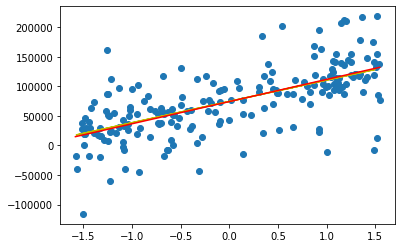

In [292]:
theta = gradientDescent(train_X, train_y, [[0], [0]], 1, 1000)
plot(theta, mu, sigma)

Now let's calculate our model's error with MSE(Mean Squared Error) and MAE(Mean Absolute Error).

In [293]:
def meanSquaredError(X, y, theta):
    E = (X @ theta)-y
    return (np.transpose(E) @ E)[0,0] / (2*y.size)
def meanAbsoluteError(X, y, theta):
    return np.average(np.absolute((X @ theta)-y))

In [294]:
val_X = (val_X - mu) / sigma
val_X = np.c_[np.ones((len(val_X))), val_X]

In [295]:
print(meanSquaredError(val_X, val_y, theta))
print(meanAbsoluteError(val_X, val_y, theta))

1800928.8590903028
1129.7882431770167
